# Goals

* Create a DAG of the SRAgent agent/tool hierarchy

In [1]:
library(ape)
library(dplyr)
library(tidyr)
library(ggtree)
library(ggplot2)



Attaching package: ‘dplyr’


The following object is masked from ‘package:ape’:

    where


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


ggtree v3.14.0 Learn more at https://yulab-smu.top/contribution-tree-data/

Please cite:

S Xu, Z Dai, P Guo, X Fu, S Liu, L Zhou, W Tang, T Feng, M Chen, L
Zhan, T Wu, E Hu, Y Jiang, X Bo, G Yu. ggtreeExtra: Compact
visualization of richly annotated phylogenetic data. Molecular Biology
and Evolution. 2021, 38(9):4039-4042. doi: 10.1093/molbev/msab166


Attaching package: ‘ggtree’


The following object is masked from ‘package:tidyr’:

    expand


The following object is masked from ‘package:ape’:

    rotate




In [2]:
newick_str <- "(
  (esearch_scrna:1,find_datasets_agent_node:1)find_datasets_agent:1,
  (
    (esearch_1:1,esearch_agent_node:1)esearch_agent:1,
    (esummary_1:1,esummary_agent_node:1)esummary_agent:1,
    (elink_1:1,elink_agent_node:1)elink_agent:1,
    fetch_geo_record:1,
    fetch_ncbi_record:1,
    entrez_convert_agent_node:2
  )entrez_convert_agent:1,
  (
    (esearch_2:1,esummary_2:1,elink_2:1,efetch:1,entrez_agent_node:1)entrez_agent:1,
    bigquery:1,
    ncbi_fetch:1,
    sra_stat:1,
    fastq_dump:1,
    sragent_agent_node:2
  )sragent_agent:1,
  (uberon_ontology:1,tissue_ontology_agent_node:1)tissue_ontology_agent:1
)workflow_start;"

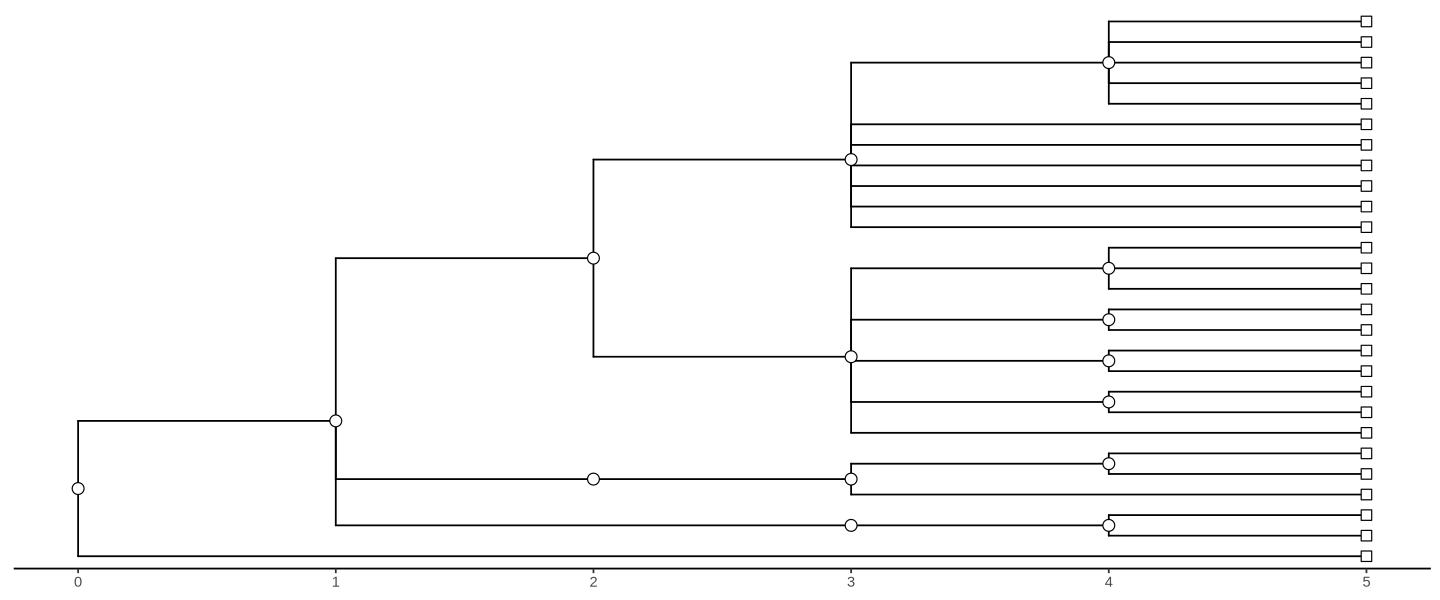

In [32]:
# Modified Newick string with proper edge lengths for inner node extensions
newick_str = "
((((((esearch,esearch_scrna,esearch_agent)esearch_agent,(esummary,esummary_agent)esummary_agent,(efetch,efetch_agent)efetch_agent,(elink,elink_agent)elink_agent,entrez_agent)entrez_agent,((fetch_ncbi_record,fetch_bioproject_record,fetch_biosample_record,fetch_geo_record,ncbi_fetch_agent)ncbi_fetch_agent,get_study_metadata,get_experiment_metadata,get_run_metadata,get_study_experiment_run,which_entrez_databases,find_datasets_agent)find_datasets_agent)find_datasets_agent,(((query_uberon_ols,tissue_ontology_agent)tissue_ontology_agent,tissue_ontology_workflow)tissue_ontology_workflow)tissue_ontology_workflow,((query_vector_db,bigquery_agent)bigquery_agent)bigquery_agent,get_neighbors,sragent_agent)sragent_agent)sragent_agent);
"

newick_str = "
((((((esearch,esearch_scrna,esearch_agent)inner_esearch_agent,(esummary,esummary_agent)inner_esummary_agent,(efetch,efetch_agent)inner_efetch_agent,(elink,elink_agent)inner_elink_agent,entrez_agent)inner_entrez_agent,((fetch_ncbi_record,fetch_bioproject_record,fetch_biosample_record,fetch_geo_record,ncbi_fetch_agent)inner_ncbi_fetch_agent,get_study_metadata,get_experiment_metadata,get_run_metadata,get_study_experiment_run,which_entrez_databases,find_datasets_agent)inner_find_datasets_agent)inner_find_datasets_agent2,(((query_uberon_ols,tissue_ontology_agent)inner_tissue_ontology_agent,tissue_ontology_workflow)inner_tissue_ontology_workflow)inner_tissue_ontology_workflow2,((query_vector_db,bigquery_agent)inner_bigquery_agent)inner_bigquery_agent2,get_neighbors,sragent_agent)inner_sragent_agent)inner_sragent_agent2);
"

newick_str = "
(((((esearch,esearch_scrna,esearch_agent)inner_esearch_agent,(esummary,esummary_agent)inner_esummary_agent,(efetch,efetch_agent)inner_efetch_agent,(elink,elink_agent)inner_elink_agent,entrez_agent)inner_entrez_agent,((fetch_ncbi_record,fetch_bioproject_record,fetch_biosample_record,fetch_geo_record,ncbi_fetch_agent)inner_ncbi_fetch_agent,get_study_metadata,get_experiment_metadata,get_run_metadata,get_study_experiment_run,which_entrez_databases,sragent_agent)inner_sragent)inner_find_datasets_agent,(((query_uberon_ols,tissue_ontology_agent)inner_tissue_ontology_agent,tissue_ontology_workflow)inner_tissue_ontology_workflow)inner_tissue_ontology_workflow2,((query_vector_db,bigquery_agent)inner_bigquery_agent)inner_bigquery_agent2),find_datasets_agent);
"

# Remove whitespace for parsing
newick_str <- gsub("\\s+", "", newick_str)

# Read tree
tree <- read.tree(text = newick_str)

# Plot with ggtree
p_tree <- ggtree(tree) + 
  geom_point(aes(shape = isTip), size = 3, fill = "white") +
  scale_shape_manual(values = c(21, 22), guide = "none") +
  #geom_tiplab(size = 3, hjust = -0.1) +
  #geom_nodelab(size = 3, vjust = -1, hjust = 0.5) +
  theme_tree2() #+
  #xlim(0, 6) 

options(repr.plot.width = 12, repr.plot.height = 5)
print(p_tree)

In [33]:
# get the order of the p_tree tip labels
tip_order = p_tree$data %>%
   filter(isTip == TRUE) %>%
   arrange(y)
tip_order

parent,node,label,isTip,x,y,branch,angle
<int>,<int>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
28,27,find_datasets_agent,TRUE,5,1,2.5,13.33333
42,25,query_vector_db,TRUE,5,2,4.5,26.66667
42,26,bigquery_agent,TRUE,5,3,4.5,40.00000
39,24,tissue_ontology_workflow,TRUE,5,4,4.0,53.33333
40,22,query_uberon_ols,TRUE,5,5,4.5,66.66667
40,23,tissue_ontology_agent,TRUE,5,6,4.5,80.00000
31,10,entrez_agent,TRUE,5,7,4.0,93.33333
33,4,esummary,TRUE,5,8,4.5,106.66667
33,5,esummary_agent,TRUE,5,9,4.5,120.00000


In [34]:
base_dir = '/home/nickyoungblut/dev/python/scBaseCount_analysis'
tool_calls = file.path(base_dir, 'data', 'SRAgent_profiling', 'langsmith_tool_calls.csv')

# read csv
tool_calls = read.csv(tool_calls) %>%
    filter(
        has_error == "False",
        duration_seconds < 200
    ) %>%
    mutate(
        tool_group = ifelse(grepl("^invoke_", tool_name), "Agent", "Tool"),
        tool_name = gsub("^invoke_", "", tool_name)
    )
tool_calls %>% head(n=2)

,run_id,trace_id,tool_name,run_type,start_time,end_time,duration_seconds,duration_ms,has_error,error_message,⋯,input_summary,output_keys,output_size_chars,output_summary,custom_metadata,tags,total_tokens,prompt_tokens,completion_tokens,tool_group
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<lgl>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
1,48149a77-b068-4695-9bd0-abb34165b107,6e41431a-f1a2-448a-8a5f-6032a2752c31,efetch,tool,2025-07-02T20:00:30.800386,2025-07-02T20:00:31.348814,0.548428,548.428,False,NA,⋯,"{'input': ""{'entrez_ids': ['35538296'], 'database': 'sra'}""}",['output'],10491,"{'output': {'content': '{""EXPERIMENT_PACKAGE_SET"": {""EXPERIMENT_PACKAGE"": {""EXPERIMENT"": {""@accession"": ""SRX26315195"", ""@alias"": ""PIPseq_sc_APP"", ""IDENTIFIERS"": {""PRIMARY_ID"": ""SRX26315195""}, ""TITLE"":...","{'max_datasets': 1, 'use_database': False, 'reprocess_existing': False, 'min_date': '2015/07/05', 'max_date': '2025/07/02', 'langgraph_step': 2, 'langgraph_node': 'tools', 'langgraph_triggers': ['__pregel_push'], 'langgraph_path': ['__pregel_push', 0, False], 'langgraph_checkpoint_ns': 'srx_info_node:f212a28e-af55-76ea-f7d1-1e8ad873d796|metadata_graph_node:e05df95f-7dde-7940-3849-168b3edc2ee5|SRX2SRR_node:9263f2bb-ccfb-a76f-c80e-cc70b851e2a3|tools:22b11767-9593-2c34-254c-2cd34a4e1b58|tools:bec15ac4-5027-11ff-e759-f40aa07505e6|tools:5ea19cb6-db46-0561-fd63-c9c9946877df', 'checkpoint_ns': 'srx_info_node:f212a28e-af55-76ea-f7d1-1e8ad873d796', 'revision_id': '0.4.0-12-ga2949cd-dirty', 'ls_run_depth': 15}",['seq:step:1'],0,0,0,Tool
2,a931d975-bbfa-4810-a15e-a10d0555540c,6e41431a-f1a2-448a-8a5f-6032a2752c31,efetch_agent,tool,2025-07-02T20:00:28.889893,2025-07-02T20:00:36.731486,7.841593,7841.593,False,NA,⋯,"{'input': ""{'message': 'eFetch database=sra id=35538296'}""}",['output'],1084,"{'output': {'content': ""{'messages': [AIMessage(content='Experiment accession: SRX26315195 \\nTitle: single cell on PIPseq APP mouse brain \\nStudy accession: SRP537176 (PRJNA1170298) \\nSample acc...","{'max_datasets': 1, 'use_database': False, 'reprocess_existing': False, 'min_date': '2015/07/05', 'max_date': '2025/07/02', 'langgraph_step': 4, 'langgraph_node': 'tools', 'langgraph_triggers': ['__pregel_push'], 'langgraph_path': ['__pregel_push', 0, False], 'langgraph_checkpoint_ns': 'srx_info_node:f212a28e-af55-76ea-f7d1-1e8ad873d796|metadata_graph_node:e05df95f-7dde-7940-3849-168b3edc2ee5|SRX2SRR_node:9263f2bb-ccfb-a76f-c80e-cc70b851e2a3|tools:22b11767-9593-2c34-254c-2cd34a4e1b58|tools:bec15ac4-5027-11ff-e759-f40aa07505e6', 'checkpoint_ns': 'srx_info_node:f212a28e-af55-76ea-f7d1-1e8ad873d796', 'revision_id': '0.4.0-12-ga2949cd-dirty', 'ls_run_depth': 12}",['seq:step:1'],4766,4460,306,Agent


In [35]:
tool_calls %>% distinct(tool_name) %>% arrange(tool_name)

tool_name
<chr>
bigquery_agent
efetch
efetch_agent
elink
elink_agent
entrez_agent
esearch
esearch_agent
esearch_scrna


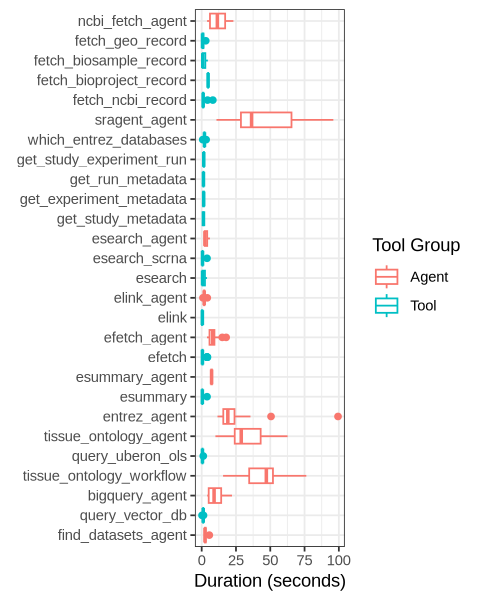

In [39]:
options(repr.plot.width = 4, repr.plot.height = 5)

p_box  = tool_calls %>%
    semi_join(tip_order, by = c("tool_name" = "label")) %>%
    mutate(
        tool_name = factor(tool_name, levels = tip_order$label)
    ) %>%
    ggplot(aes(tool_name, duration_seconds, color=tool_group)) +
    geom_boxplot() +
    coord_flip() +
    theme_bw() +
    labs(x="Tool Name", y="Duration (seconds)", color="Tool Group")  +
    theme(
        axis.title.y = element_blank(),
    )
p_box

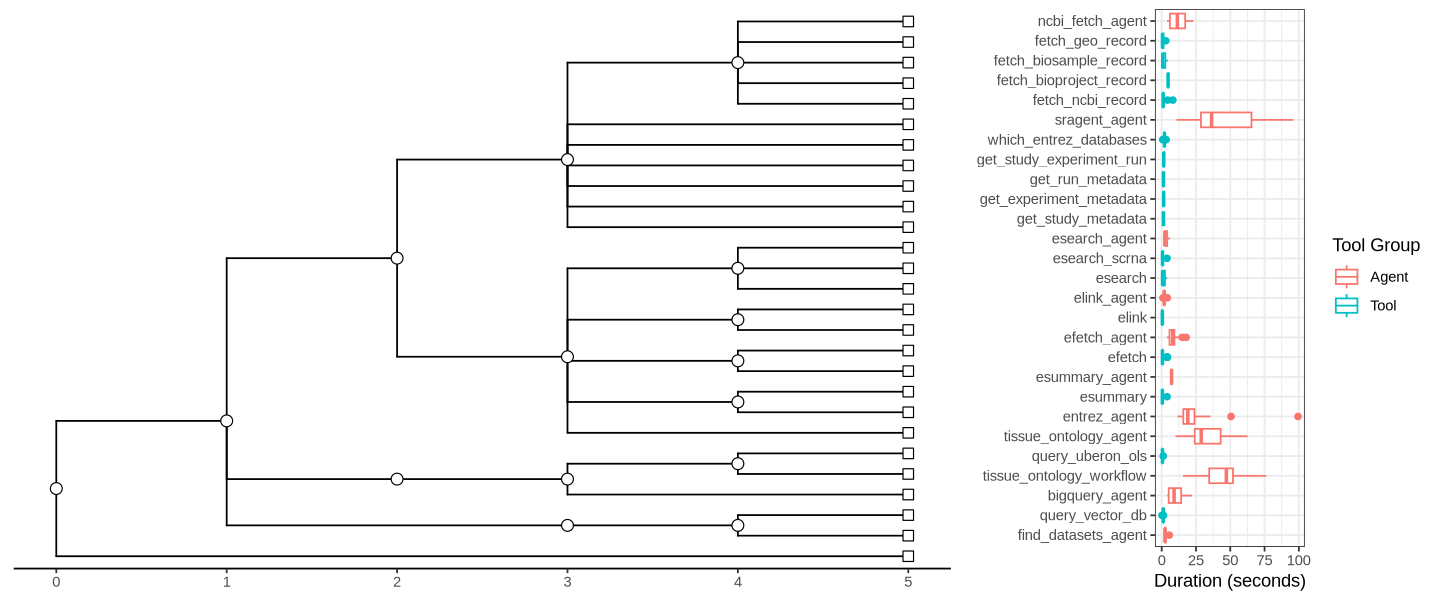

In [40]:
# arrange with cowplot
options(repr.plot.width = 12, repr.plot.height = 5)
cowplot::plot_grid(p_tree, p_box, ncol = 2, rel_widths = c(1, 0.5))

In [42]:
options(repr.plot.width = 8, repr.plot.height = 5)
p_tree + geom_facet(
    panel = "Boxplot", 
    data = tool_calls %>% semi_join(tip_order, by = c("tool_name" = "label")),
    geom = geom_boxplot, 
    mapping = aes(
        x = duration_seconds, 
        group = tool_name,
        fill = tool_group
))

ERROR: Error in `[[<-.data.frame`(`*tmp*`, ".panel", value = structure(2L, levels = c("Tree", : replacement has 1 row, data has 0


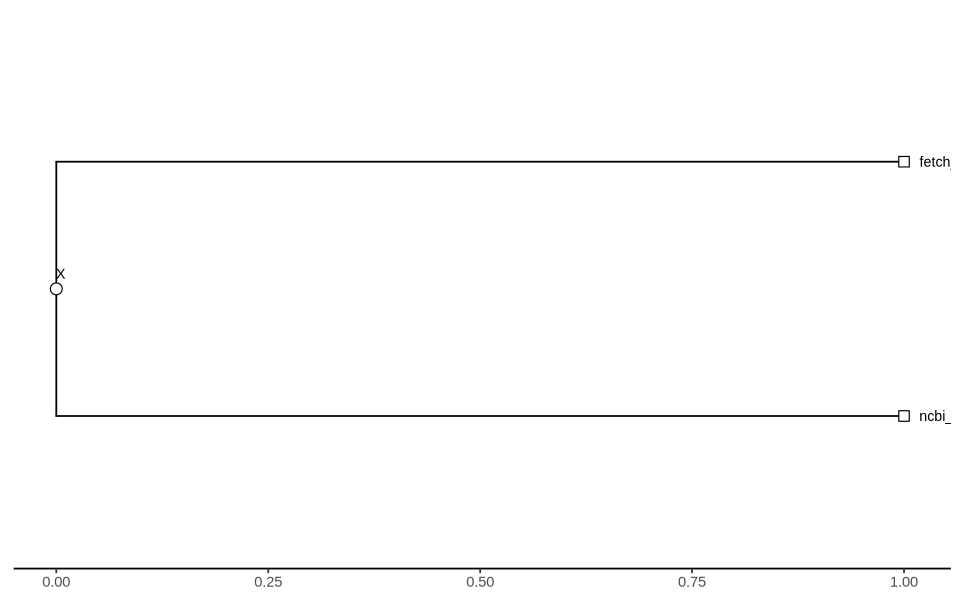

: 

In [ ]:
newick_str = "
(ncbi_fetch_agent,fetch_geo_record)X;
"

# Remove whitespace for parsing
newick_str <- gsub("\\s+", "", newick_str)

# Read tree
tree <- read.tree(text = newick_str)

# Plot with ggtree
p_tree <- ggtree(tree) + 
  geom_point(aes(shape = isTip), size = 3, fill = "white") +
  scale_shape_manual(values = c(21, 22), guide = "none") +
  geom_tiplab(size = 3, hjust = -0.1) +
  geom_nodelab(size = 3, vjust = -1, hjust = 0.5) +
  theme_tree2() #+
  #xlim(0, 8) 

print(p_tree)

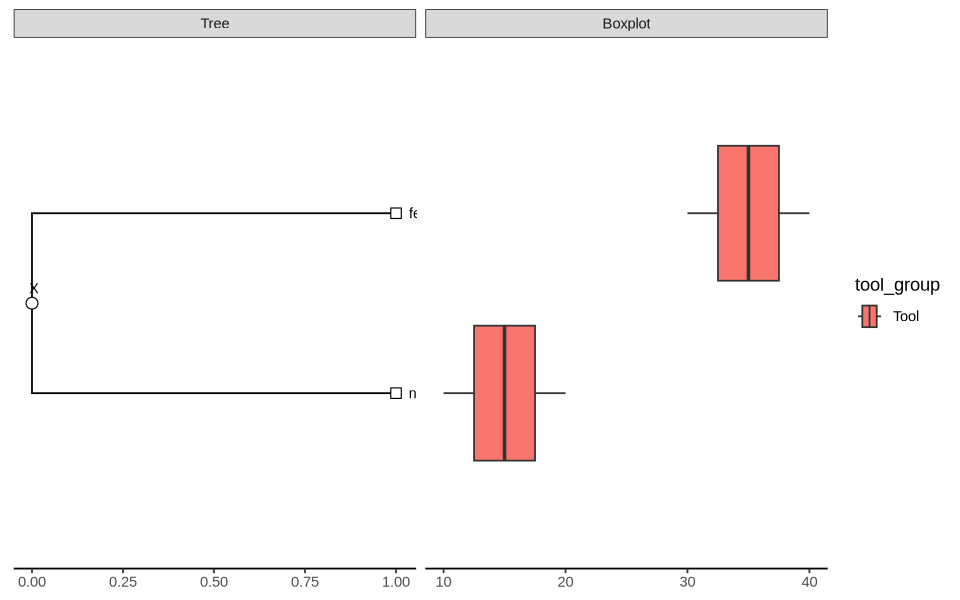

In [23]:
options(repr.plot.width = 8, repr.plot.height = 5)

df = data.frame(
    label = c("ncbi_fetch_agent", "ncbi_fetch_agent", "fetch_geo_record", "fetch_geo_record"),
    duration_seconds = c(10, 20, 30, 40),
    tool_group = c("Tool", "Tool", "Tool", "Tool")
)

p_tree + geom_facet(
    panel = "Boxplot", 
    data = df,
    geom = geom_boxplot,
    mapping = aes(
        x = duration_seconds, 
        group = label,
        fill = tool_group
    )
)

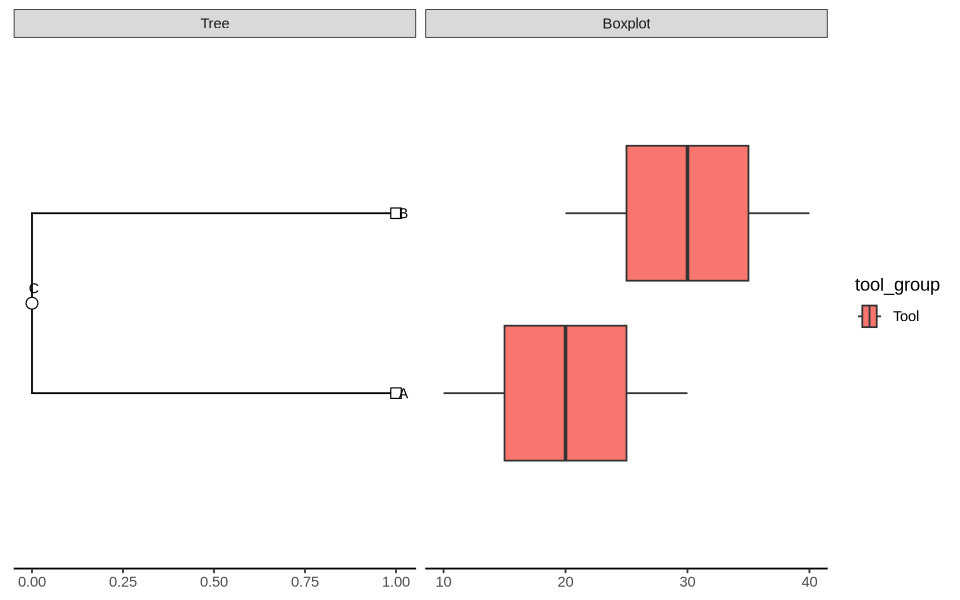

In [30]:
newick_str = "(A,B)C;"

tree <- read.tree(text = newick_str)

p_tree <- ggtree(tree) + 
  geom_point(aes(shape = isTip), size = 3, fill = "white") +
  scale_shape_manual(values = c(21, 22), guide = "none") +
  geom_tiplab(size = 3, hjust = -0.1) +
  geom_nodelab(size = 3, vjust = -1, hjust = 0.5) +
  theme_tree2() 

df = data.frame(
    label = c("A", "B", "A", "B"),
    duration_seconds = c(10, 20, 30, 40),
    tool_group = c("Tool", "Tool", "Tool", "Tool")
)

p_tree + geom_facet(
    panel = "Boxplot", 
    data = df,
    geom = geom_boxplot,
    mapping = aes(
        x = duration_seconds, 
        group = label,
        fill = tool_group
    )
)